In [121]:
# 1: Uvoz biblioteka i učitavanje podataka

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

# Stilizacija grafikona
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Ucitavanje podataka o potrosnji
data_path = 'Datasets/PERSONAL HOUSEHOLD CONSUMPTION, MONTHLY AVERAGE.csv'
data = pd.read_csv(data_path, sep=';')

# Ucitavanje podataka o platama
salary_data_path = 'Datasets/plate-godisnji-prosek.xlsx'
salary_data = pd.read_excel(salary_data_path)

# Izracunavanje procesne mesecne zarade
salary_data['Prosecna mesecna zarada'] = salary_data['Prosecna godisnja zarada'] / 12


In [122]:
# Provera tipova podataka
data_types = data.dtypes
print(data_types)

idindikator         object
IDTer               object
nTer                object
IDTipNaselja        object
nTipNaselja         object
mes                  int64
god                  int64
IDVrPod              int64
nVrPod              object
IDCOICOP             int64
nCOICOP             object
vrednost           float64
idJedinicaMere     float64
nJedinicaMere      float64
nIzvorI             object
Indikator           object
IDStatusPodatka     object
nStatusPodatka      object
dtype: object


In [123]:
# Provera dimenzije podataka
np.shape(data)

(6240, 18)

In [124]:

# Provera nedostajućih vrednosti
missing_values = data.isnull().sum()

In [125]:
# Koristimo Pandas DataFrame za bolju strukturu podataka
df = pd.DataFrame(data)
df.head()

,idindikator,IDTer,nTer,IDTipNaselja,nTipNaselja,mes,god,IDVrPod,nVrPod,IDCOICOP,nCOICOP,vrednost,idJedinicaMere,nJedinicaMere,nIzvorI,Indikator,IDStatusPodatka,nStatusPodatka
0,010201IND01,RS,REPUBLIC OF SERBIA,0,Total,0,2006,1,RSD,0,Total,33910.0,NaN,NaN,SORS,"Personal household consumption, monthly average",A,Normal value
1,010201IND01,RS,REPUBLIC OF SERBIA,0,Total,0,2006,2,"structure, %",0,Total,100.0,NaN,NaN,SORS,"Personal household consumption, monthly average",A,Normal value
2,010201IND01,RS,REPUBLIC OF SERBIA,0,Total,0,2006,1,RSD,100,Food and non-alcoholic beverages,13241.0,NaN,NaN,SORS,"Personal household consumption, monthly average",A,Normal value
3,010201IND01,RS,REPUBLIC OF SERBIA,0,Total,0,2006,2,"structure, %",100,Food and non-alcoholic beverages,39.0,NaN,NaN,SORS,"Personal household consumption, monthly average",A,Normal value
4,010201IND01,RS,REPUBLIC OF SERBIA,0,Total,0,2006,1,RSD,200,"Alcoholic beverages, tobacco and narcotics",1478.0,NaN,NaN,SORS,"Personal household consumption, monthly average",A,Normal value


In [126]:
# Osnovne statistike podataka - Opis
df.describe()

,mes,god,IDVrPod,IDCOICOP,vrednost,idJedinicaMere,nJedinicaMere
count,6240.0,6240.000000,6240.00000,6240.000000,6240.000000,0.0,0.0
mean,0.0,2013.625000,1.50000,600.000000,4217.537179,NaN,NaN
std,0.0,4.807606,0.50004,374.195724,11280.801653,NaN,NaN
min,0.0,2006.000000,1.00000,0.000000,0.100000,NaN,NaN
25%,0.0,2009.750000,1.00000,300.000000,5.100000,NaN,NaN
50%,0.0,2013.500000,1.50000,600.000000,100.000000,NaN,NaN
75%,0.0,2017.250000,2.00000,900.000000,2922.250000,NaN,NaN
max,0.0,2022.000000,2.00000,1200.000000,88083.000000,NaN,NaN


In [127]:
# Osnovne statistike podataka - Opis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idindikator      6240 non-null   object 
 1   IDTer            6240 non-null   object 
 2   nTer             6240 non-null   object 
 3   IDTipNaselja     6240 non-null   object 
 4   nTipNaselja      6240 non-null   object 
 5   mes              6240 non-null   int64  
 6   god              6240 non-null   int64  
 7   IDVrPod          6240 non-null   int64  
 8   nVrPod           6240 non-null   object 
 9   IDCOICOP         6240 non-null   int64  
 10  nCOICOP          6240 non-null   object 
 11  vrednost         6240 non-null   float64
 12  idJedinicaMere   0 non-null      float64
 13  nJedinicaMere    0 non-null      float64
 14  nIzvorI          6240 non-null   object 
 15  Indikator        6240 non-null   object 
 16  IDStatusPodatka  6240 non-null   object 
 17  nStatusPodatka

In [128]:
# Provera duplikata
df.duplicated().sum()

0

In [129]:
# Provera vrednosti (koliko imamo podataka)
df.nTer.value_counts()

nTer
REPUBLIC OF SERBIA                  1248
Beogradski region                   1248
Region Vojvodine                    1248
Region Šumadije i Zapadne Srbije    1248
Region Južne i Istočne Srbije       1248
Name: count, dtype: int64

In [130]:
# Provera vrednosti (koliko imamo podataka)
df.nCOICOP.value_counts()

nCOICOP
Total                                                                 480
Food and non-alcoholic beverages                                      480
Alcoholic beverages, tobacco and narcotics                            480
Clothing and footwear                                                 480
Housing, water, electricity, gas and other fuels                      480
Furnishings, household equipment and routine household maintenance    480
Health                                                                480
Transport                                                             480
Communication                                                         480
Recreation and culture                                                480
Education                                                             480
Restaurants and hotels                                                480
Miscellaneous goods and services                                      480
Name: count, dtype: int64

In [131]:
# ------- Vizualizacija podataka ------- #

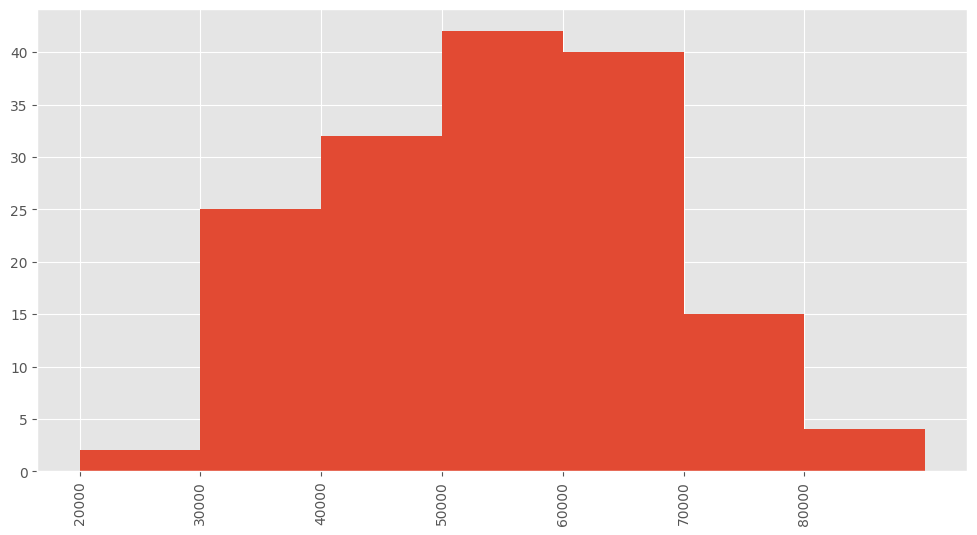

<Figure size 1400x800 with 0 Axes>

In [132]:
# Prikaz zastupljenosti potrosnje u vrednosti RSD
hist_vrednost = df[(df['nVrPod'] == 'RSD') & (data['nCOICOP'] == 'Total') & (data['nTipNaselja'] != 'Total')]
# Definisanje opsega za bins
bins = [20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
# Crtanje histograma
plt.hist(hist_vrednost.vrednost,bins=bins)
# Podesavanje x-ose
plt.xticks(range(20000,90000,10000), rotation=90)
# Podesavanje velicine grafa
plt.figure(figsize=(14,8))
# Prikazivanje grafikona
plt.show()

C:\Users\nenad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


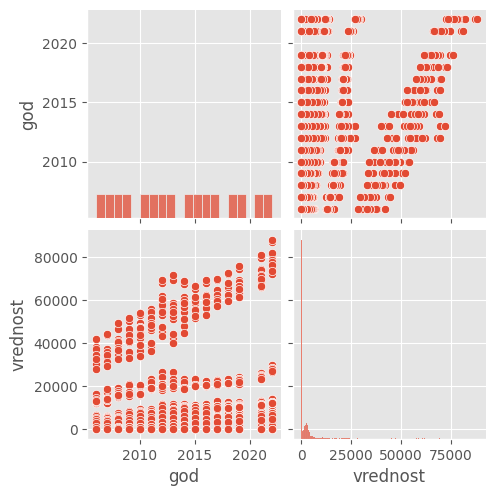

In [133]:
sns.pairplot(df, vars=['god','vrednost'])

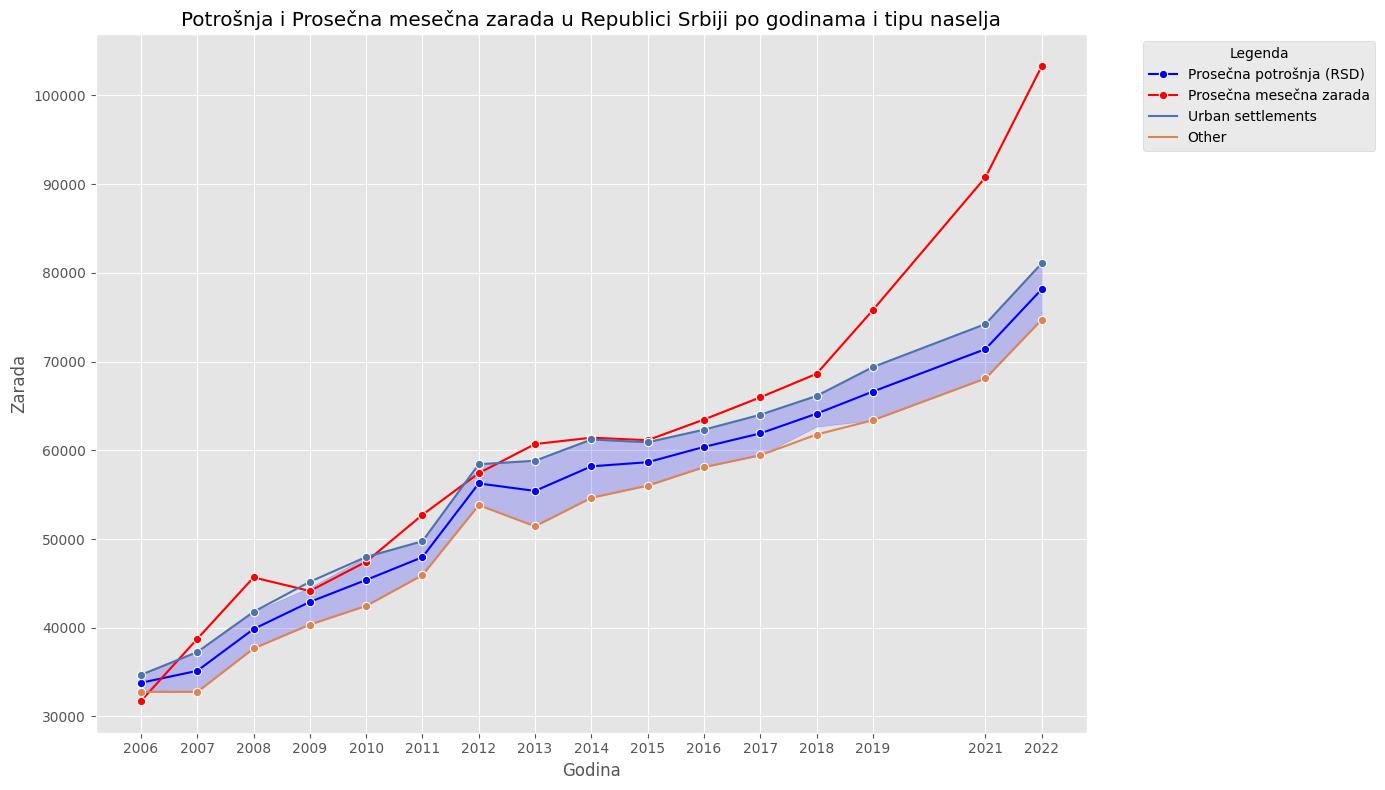

In [134]:
# Priprema podataka za potrošnju po godinama
data_total_rsd = df[(df['nCOICOP'] == 'Total') & (df['nVrPod'] == 'RSD') & (df['nTer'] == 'REPUBLIC OF SERBIA')]

# Priprema podataka za potrošnju po tipu naselja
data_by_settlement_type = df[(df['nTipNaselja'] != 'Total') & (df['nCOICOP'] == 'Total') & (df['nVrPod'] == 'RSD') & (df['nTer'] == 'REPUBLIC OF SERBIA')]

# Spajanje podataka o potrošnji i zaradi
combined_data = data_total_rsd.merge(salary_data, left_on='god', right_on='Godina', how='left')


# Vizualizacija ukupne potrošnje, prosečnih mesečnih zarada i potrošnje po tipu naselja
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', data=combined_data, marker='o', label='Prosečna potrošnja (RSD)', color='blue')
sns.lineplot(x='god', y='Prosecna mesecna zarada', data=combined_data, marker='o', color='red', label='Prosečna mesečna zarada')
sns.lineplot(x='god', y='vrednost', hue='nTipNaselja', data=data_by_settlement_type, marker='o', palette='deep')

# Formatiranje grafikona
plt.title('Potrošnja i Prosečna mesečna zarada u Republici Srbiji po godinama i tipu naselja')
plt.xlabel('Godina')
plt.ylabel('Zarada')
plt.xticks(combined_data['god'].unique())
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

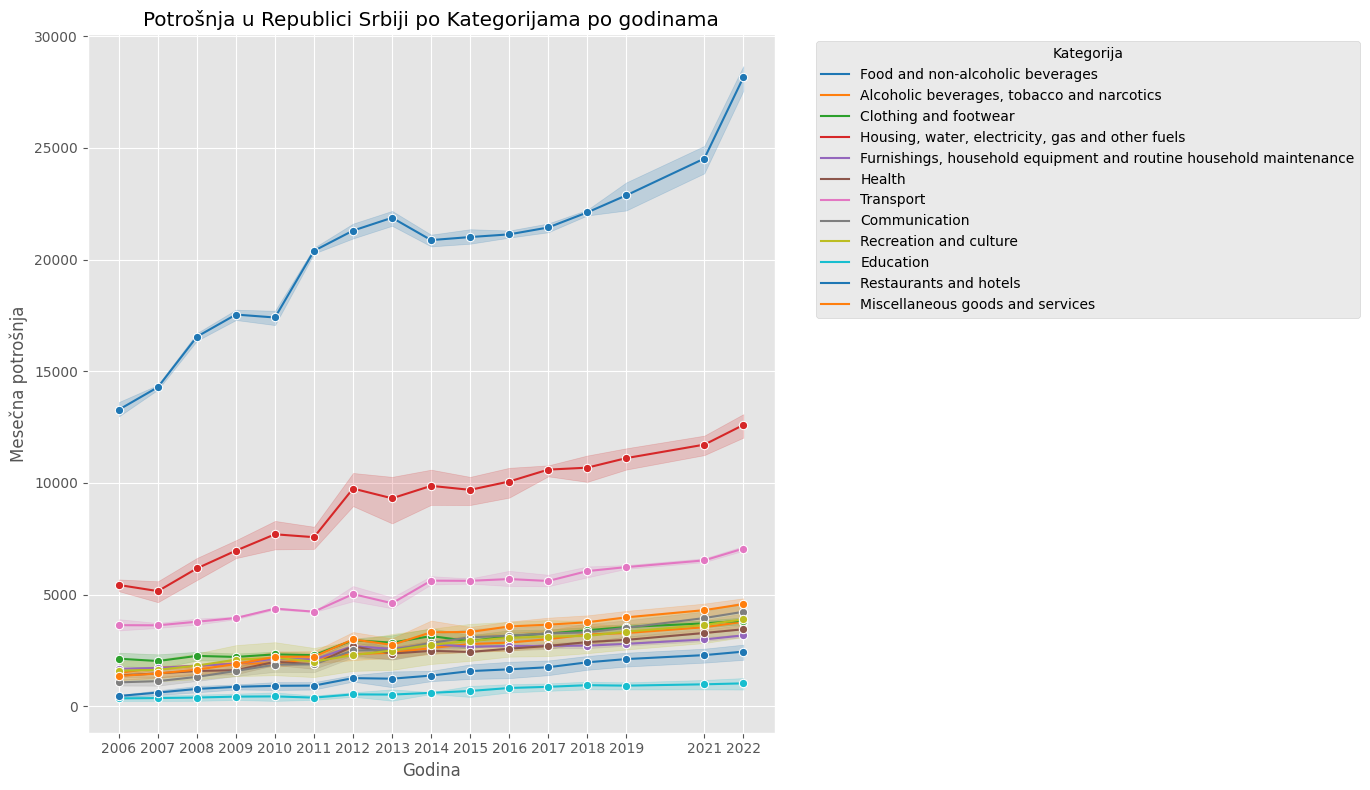

In [135]:
# Filtriranje podataka za sve kategorije osim 'Total'
data_not_total_rsd = data[(data['nCOICOP'] != 'Total') & (data['nVrPod'] == 'RSD') & (data['nTer'] == 'REPUBLIC OF SERBIA')]

# Sortiranje podataka po godinama i kategorijama za korektno prikazivanje u grafikonu
data_not_total_rsd_sorted = data_not_total_rsd.sort_values(by=['god', 'IDCOICOP'])

# Vizualizacija potrošnje po kategorijama
plt.figure(figsize=(14, 8))
sns.lineplot(x='god', y='vrednost', hue='nCOICOP', data=data_not_total_rsd_sorted, marker='o', palette='tab10')

# Formatiranje grafikona
plt.title('Potrošnja u Republici Srbiji po Kategorijama po godinama')
plt.xlabel('Godina')
plt.ylabel('Mesečna potrošnja')
plt.xticks(data_not_total_rsd_sorted['god'].unique())
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [136]:
# Filtriranje podataka za svaku grupu kategorija
data_graph_a = df[(df['nCOICOP'].isin(['Food and non-alcoholic beverages', 'Housing, water, electricity, gas and other fuels', 'Transport', 'Furnishings, household equipment and routine household maintenance', 'Communication'])) 
                    & (df['nVrPod'] == 'RSD') & (df['nTer'] == 'REPUBLIC OF SERBIA') & (df['nTipNaselja'] == 'Total')]
data_graph_b = df[(df['nCOICOP'].isin(['Alcoholic beverages, tobacco and narcotics', 'Health', 'Education','Recreation and culture', 'Restaurants and hotels', 'Miscellaneous goods and services'])) 
                    & (df['nVrPod'] == 'RSD') & (df['nTer'] == 'REPUBLIC OF SERBIA')]

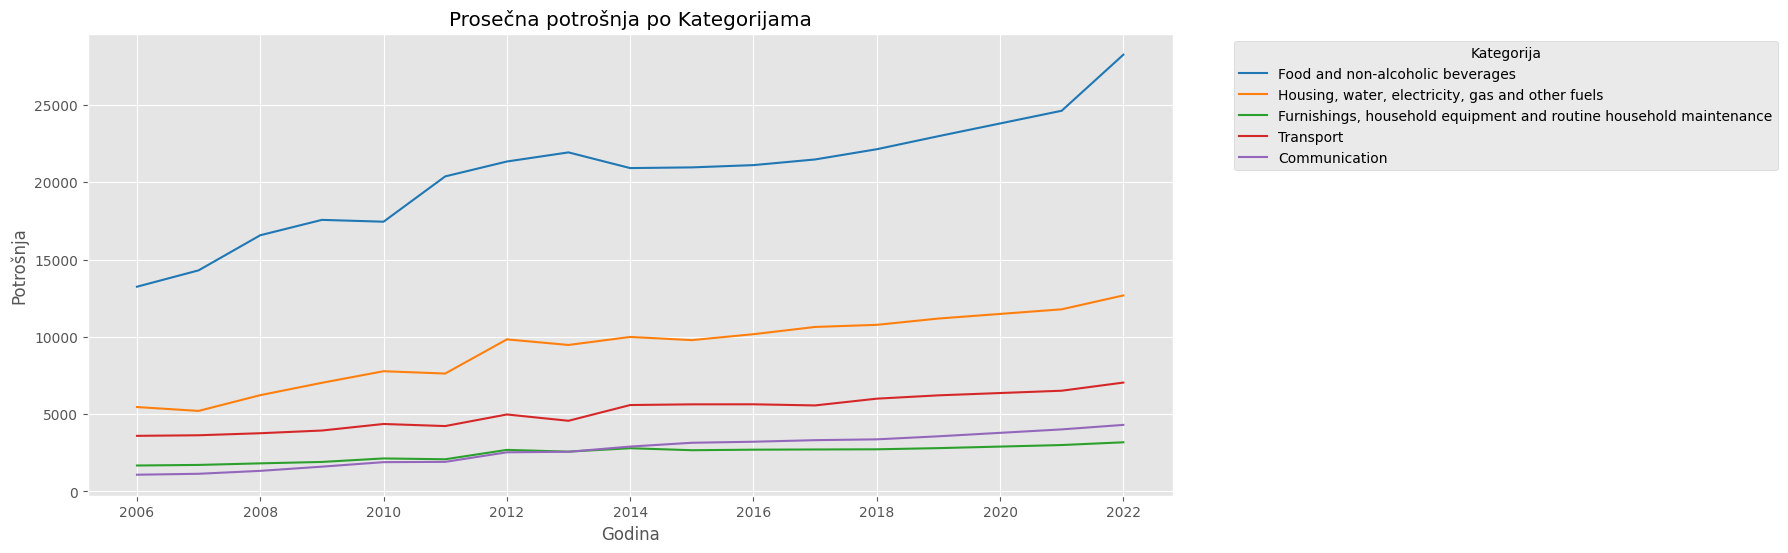

In [137]:
# Graf A - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_a, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Prosečna potrošnja po Kategorijama')
plt.xlabel('Godina')
plt.ylabel('Potrošnja')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


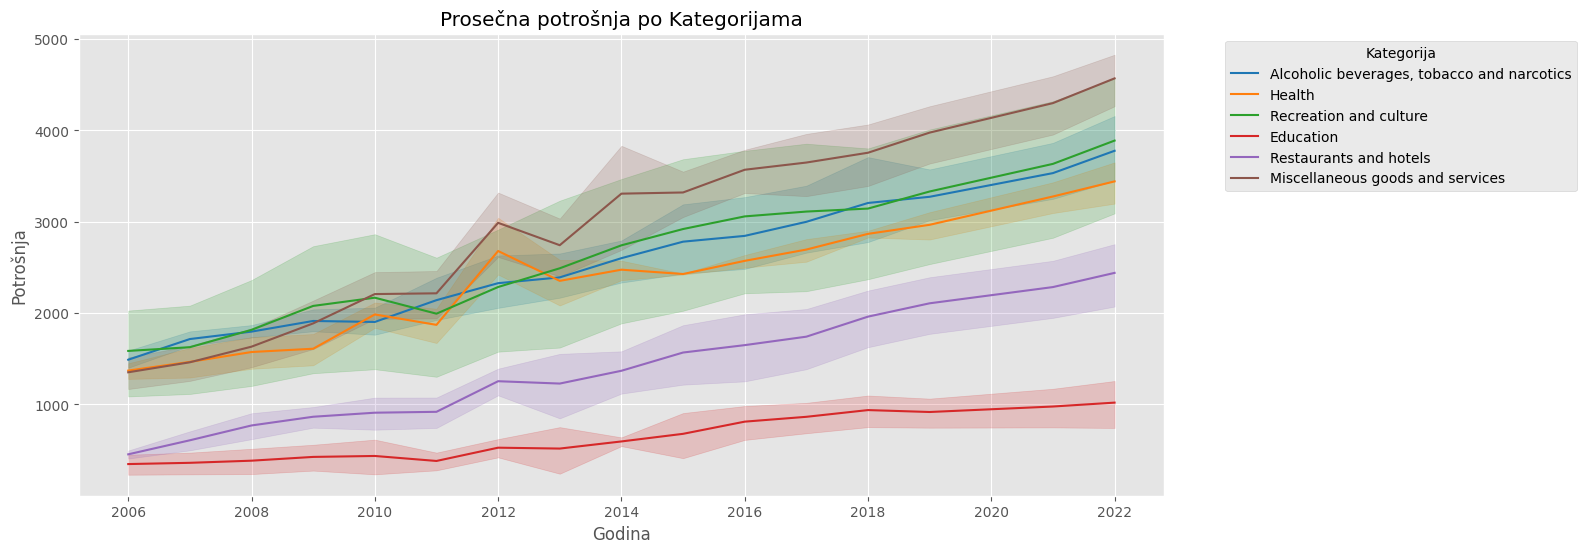

In [138]:
# Graf B - Potrošnja po Kategorijama
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_graph_b, x='god', y='vrednost', hue='nCOICOP', palette='tab10')
plt.title('Prosečna potrošnja po Kategorijama')
plt.xlabel('Godina')
plt.ylabel('Potrošnja')
plt.legend(title='Kategorija', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
